In [1]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Flatten

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
# 로이터에서 제공하는 뉴스와이어 데이터셋을 이용하겠습니다.
# 이 데이터셋은 총 11,228개의 샘플로 구성되어 있습니다.
# 라벨은 46개 주제로 지정되어 0에서 45의 값을 가지고 있습니다.
# 케라스에서 제공하는 reuters의 load_data() 함수을 이용하면 데이터셋을 쉽게 얻을
# 수 있습니다. 데이터셋은 이미 정수로 인코딩되어 있으며, 정수값은 단어의 
# 빈도수를 나타냅니다. 모든 단어를 고려할 수 없으므로 빈도수가 높은 단어를 
# 위주로 데이터셋을 생성합니다. 15,000번째로 많이 사용하는 단어까지만
# 데이터셋으로 만들고 싶다면, num_words 인자에 15000이라고 지정하면 됩니다.
max_features = 15000
text_max_words = 120

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

2113536/2110848 [==============================] - 10s 5us/step


In [3]:
# 훈련셋과 검증셋 분리
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 데이터셋 전처리 : 문장 길이 맞추기
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [4]:
# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 128)          1920000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 15360)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3932416   
_________________________________________________________________
dense_2 (Dense)              (None, 46)                11822     
Total params: 5,864,238
Trainable params: 5,864,238
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 10s 1ms/step - loss: 1.9487 - acc: 0.5200 - val_loss: 1.4803 - val_acc: 0.6519
Epoch 2/10
7000/7000 [==============================] - 9s 1ms/step - loss: 0.8458 - acc: 0.8084 - val_loss: 1.2990 - val_acc: 0.7129
Epoch 3/10
7000/7000 [==============================] - 9s 1ms/step - loss: 0.2869 - acc: 0.9473 - val_loss: 1.3286 - val_acc: 0.7180
Epoch 4/10
7000/7000 [==============================] - 9s 1ms/step - loss: 0.1877 - acc: 0.9619 - val_loss: 1.3450 - val_acc: 0.6998
Epoch 5/10
7000/7000 [==============================] - 9s 1ms/step - loss: 0.1509 - acc: 0.9633 - val_loss: 1.3907 - val_acc: 0.6948
Epoch 6/10
7000/7000 [==============================] - 9s 1ms/step - loss: 0.1380 - acc: 0.9613 - val_loss: 1.4312 - val_acc: 0.6831
Epoch 7/10
7000/7000 [==============================

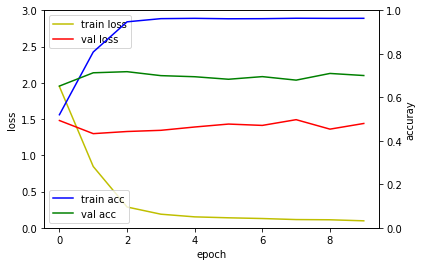

In [8]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [9]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

2246/2246 [==============================] - 0s 112us/step
## evaluation loss and_metrics ##
[1.4644516618360075, 0.6932324131789849]
